In [1]:
import os
if  not 'juxtorpus' in os.listdir():
    os.chdir('../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from juxtorpus.corpus.app import App
from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux

import warnings
warnings.filterwarnings('ignore')

# Juxtorpus
## Digital Humanities Day Demo

# 1. Build a Corpus (Tweets dataset)

In [2]:
corpora = App()

In [3]:
corpora.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…

In [4]:
corpora.corpus_builder()

## Exploring the Corpus

In [5]:
corpus = corpora['auspol']
corpus.summary()

Corpus Type                                                      SpacyCorpus
Number of Documents                                                    50000
Number of Total Words                                                 744733
Size of Vocabulary                                                     27425
mean Words per Document                                                   14
min Words per Document                                                     0
max Words per Document                                                    59
metas                      location, created_at, source, tweet_type, retw...
dtype: object

In [6]:
corpus.meta

{'location': <SeriesMeta [Id: location]>,
 'created_at': <SeriesMeta [Id: created_at]>,
 'source': <SeriesMeta [Id: source]>,
 'tweet_type': <SeriesMeta [Id: tweet_type]>,
 'retweet_count': <SeriesMeta [Id: retweet_count]>,
 'lang': <SeriesMeta [Id: lang]>}

### Corpus Timeline

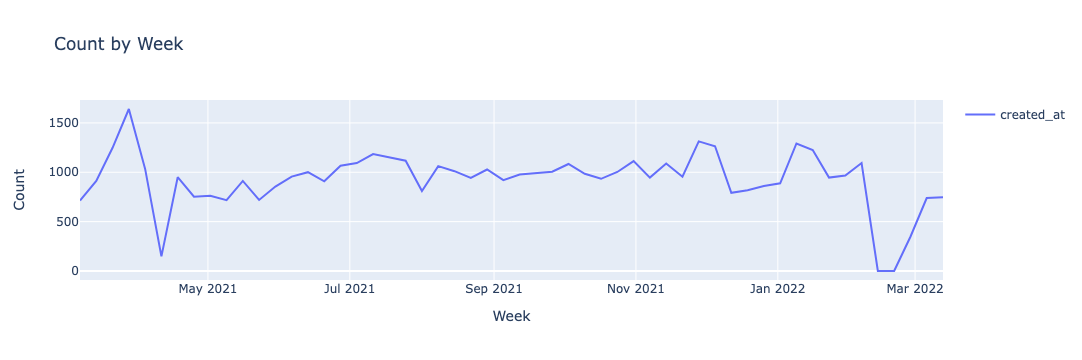

In [7]:
FREQ = '1w'
COL_TIME = 'created_at'
corpus.viz.timeline(COL_TIME, freq=FREQ)

### Corpus Wordcloud

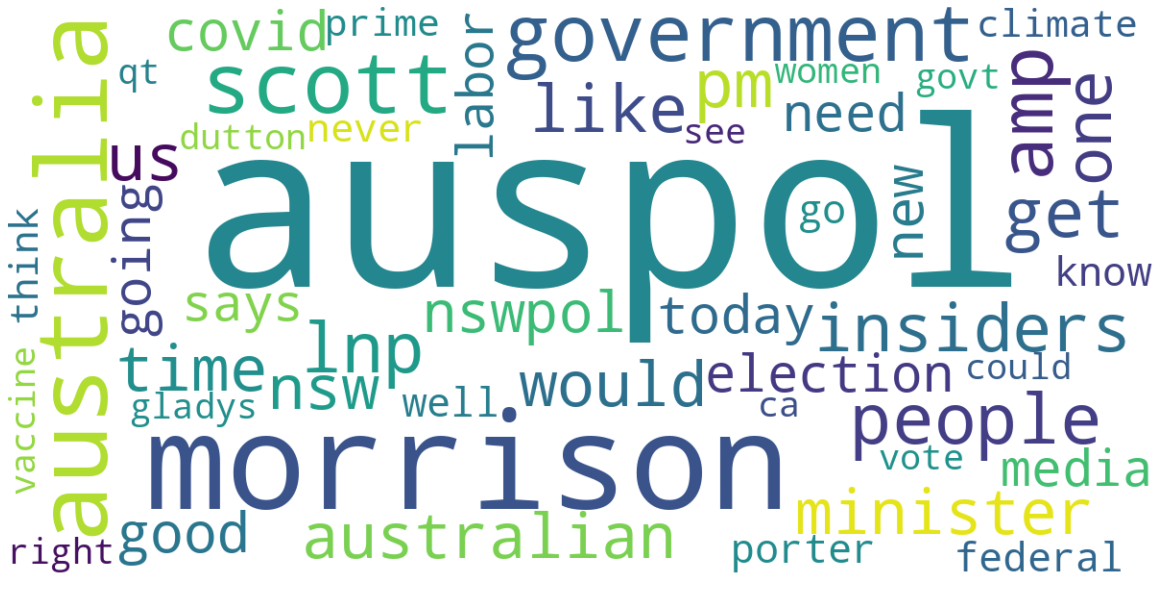

In [8]:
MAX_WORDS = 50
TYPE = 'word'
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

### Corpus Timeline & Word

In [9]:
COL_TIME = 'created_at'
FREQ = '1w'

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]
dtm = corpus.create_custom_dtm(extract_hashtags)

item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, custom_dtm=True)
item_timeline.render()

FigureWidget({
    'data': [{'marker': {'color': 'rgba(164,42,0,1.0)'},
              'mode': 'lines+markers+t…

# Corpus Slicer - creating a subcorpus

In [10]:
corpora.corpus_slicer()

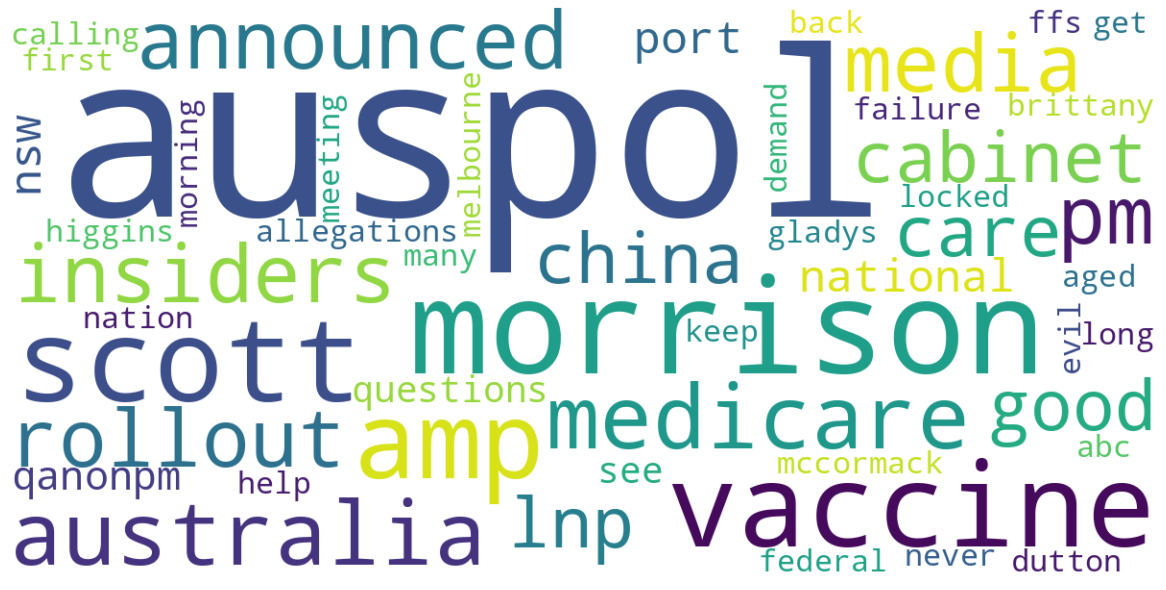

In [11]:
MAX_WORDS = 50
corpora['jun-orig-rt5+'].viz.wordcloud(max_words=MAX_WORDS)

## Topic Modelling - Add results to your corpus

In [12]:
NUM_TOPICS = 10
lda = LDA(corpora['auspol'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.025692  0.026169       1        1  13.816343
6      0.026075  0.016942       2        1  13.792585
2     -0.020135  0.049632       3        1  11.957568
8      0.017839  0.024916       4        1  10.424299
7      0.000502 -0.067573       5        1   8.936913
3     -0.082028  0.044369       6        1   8.602826
0     -0.045070  0.057650       7        1   8.586352
9      0.107332  0.113805       8        1   8.375146
4     -0.169919 -0.098983       9        1   7.786818
5      0.139710 -0.166928      10        1   7.721152, topic_info=             Term         Freq        Total Category  logprob  loglift
15131    minister  1224.000000  1224.000000  Default  30.0000  30.0000
18581       prime   781.000000   781.000000  Default  29.0000  29.0000
16466      nswpol  1103.000000  1103.000000  Default  28.0000  28.0000
18249      porter   856.000000   856.000000  Default  27.0000  27.0000
15460    morrison  7179.000000  7179.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
26972       would   140.788233  1190.600840  Topic10  -5.5395   0.4263
8008         ever   107.643021   445.203723  Topic10  -5.8079   1.1415
16770         one   130.756424  1297.970957  Topic10  -5.6134   0.2660
16448         nsw   117.391194  1166.935820  Topic10  -5.7212   0.2646
10174  government   118.460849  2032.900409  Topic10  -5.7121  -0.2814

[807 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
20         1  0.024378      abc
20         2  0.112512      abc
20         3  0.046880      abc
20         4  0.521306      abc
20         7  0.093760      abc
...      ...       ...      ...
27189      5  0.968050  zealand
27199      1  0.096477     zero
27199      5  0.100188     zero
27199      7  0.768108     zero
27199      8  0.029685     zero

[2181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 9, 8, 4, 1, 10, 5, 6])

In [13]:
corpora.corpus_slicer()

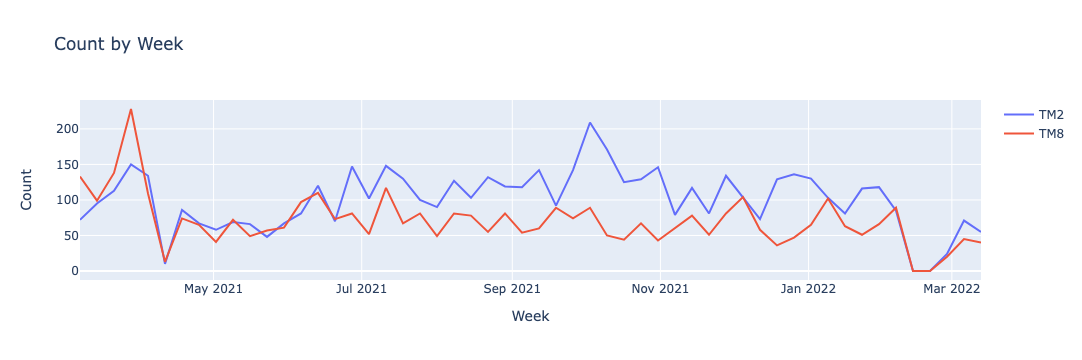

In [14]:
COL_TIME = 'created_at'
FREQ = '1w'
timelines(corpora, ['TM2', 'TM8'], COL_TIME, FREQ)

# Jux

In [14]:
corpora.corpus_slicer()

## Normal Corpus Wordcloud - term frequency

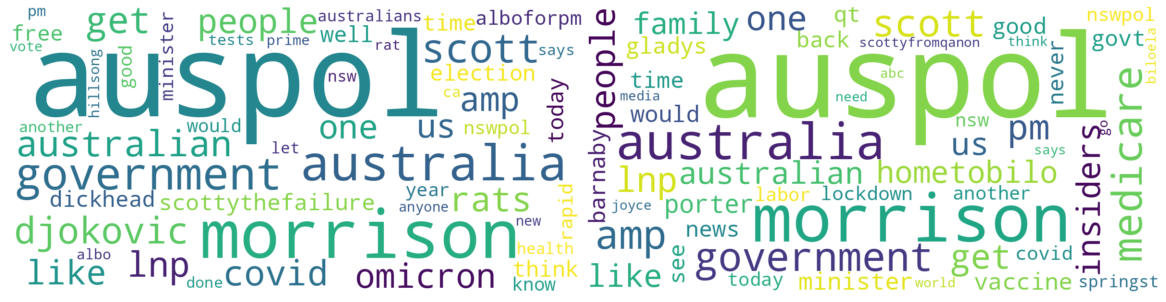

In [17]:
MAX_WORDS = 50
METRIC = 'tf'
wordclouds(corpora, ['jan', 'jun'], max_words=MAX_WORDS, metric=METRIC)

## Normal Corpus Wordcloud - tfidf

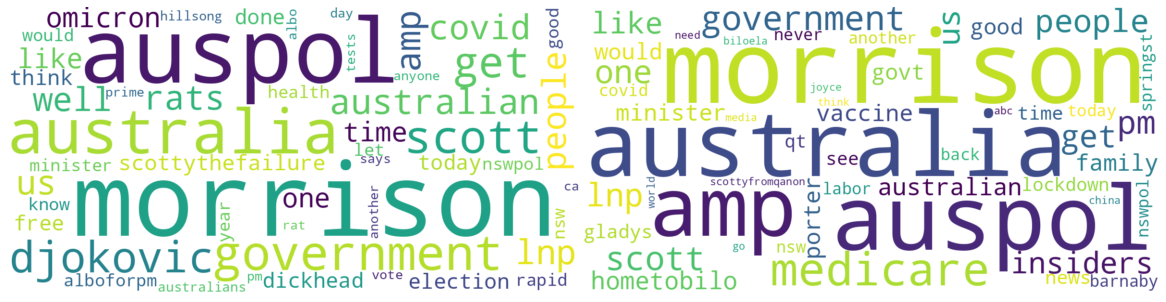

In [18]:
# let's try it with a different metric
MAX_WORDS = 50
METRIC = 'tfidf'
wordclouds(corpora, ['jan', 'jun'], max_words=MAX_WORDS, metric=METRIC)

## Jux Polarity Wordcloud - term frequency

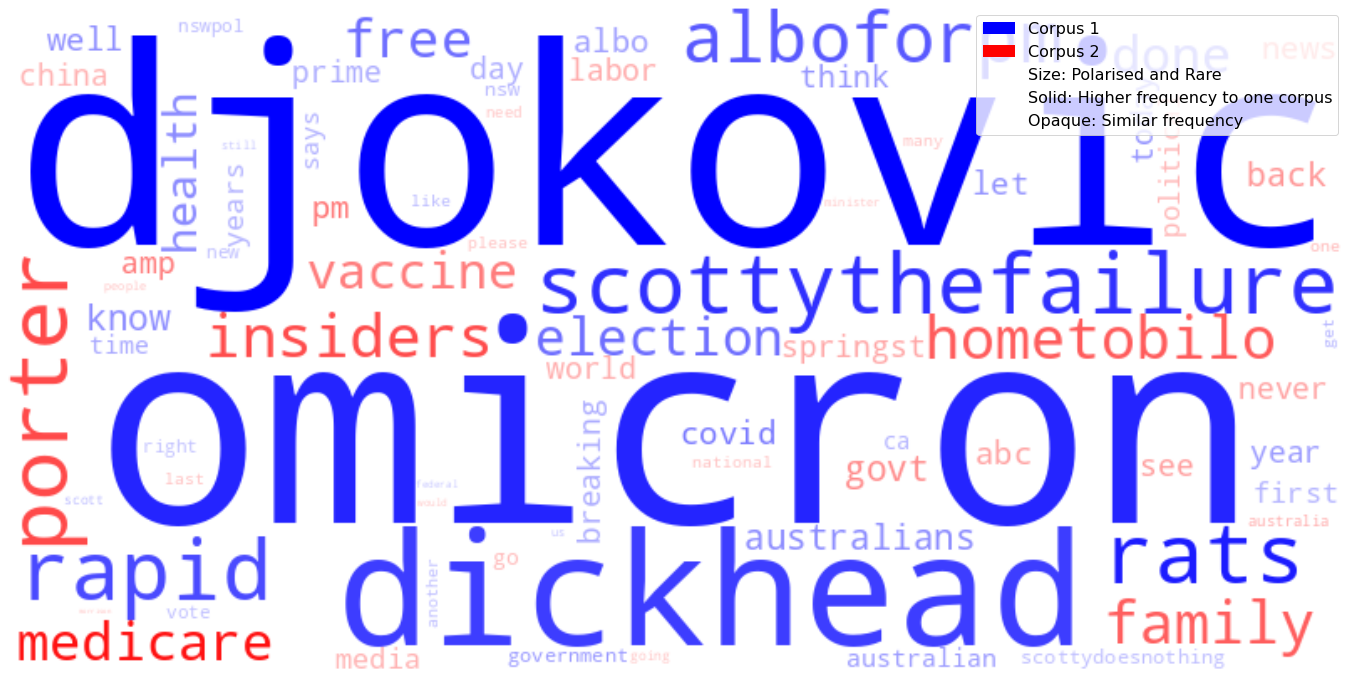

In [19]:
TOP = 80
Jux(corpora['jan'], corpora['jun']).polarity.wordcloud('tf', top=TOP, colours=('blue', 'red'))

## Jux Polarity Wordcloud - tfidf

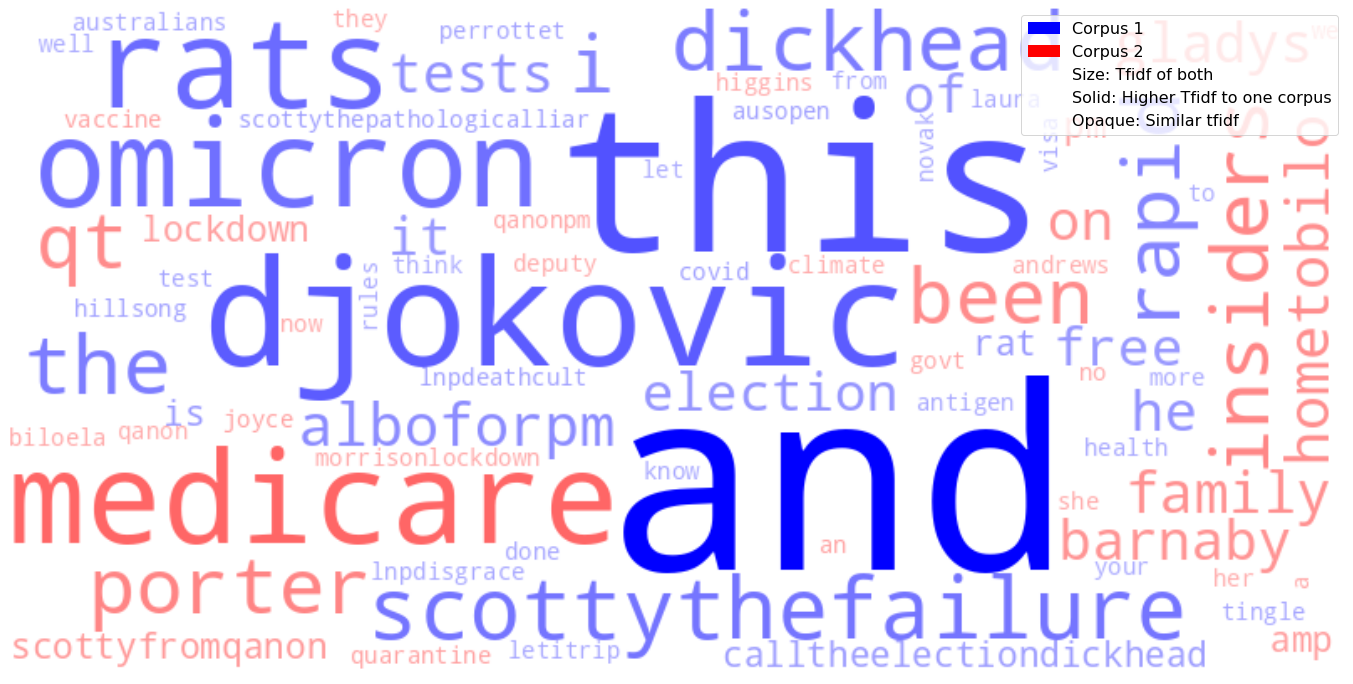

In [20]:
TOP - 80
Jux(corpora['jan'], corpora['jun']).polarity.wordcloud('tfidf', top=TOP, colours=('blue', 'red'))

## Jux Polarity Wordcloud - log likelihood

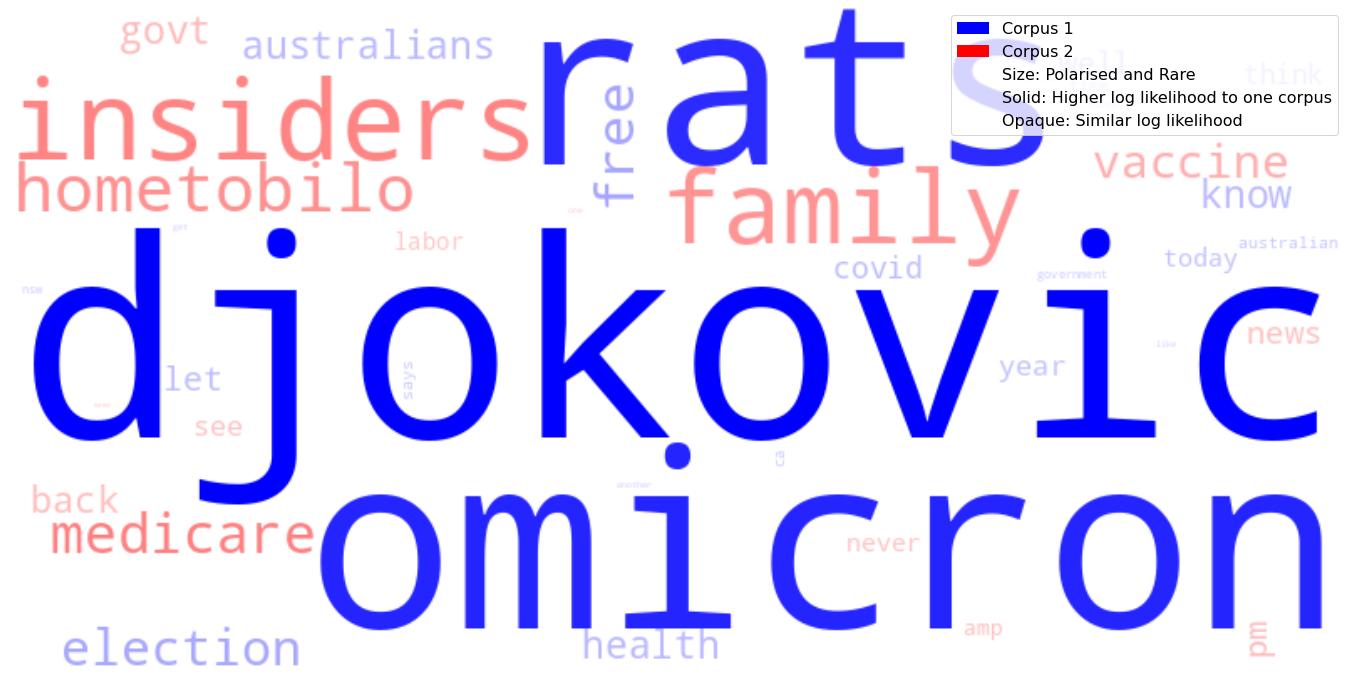

In [21]:
Jux(corpora['jan'], corpora['jun']).polarity.wordcloud('log_likelihood', top=TOP, colours=('blue', 'red'))

### User defined tokenising function

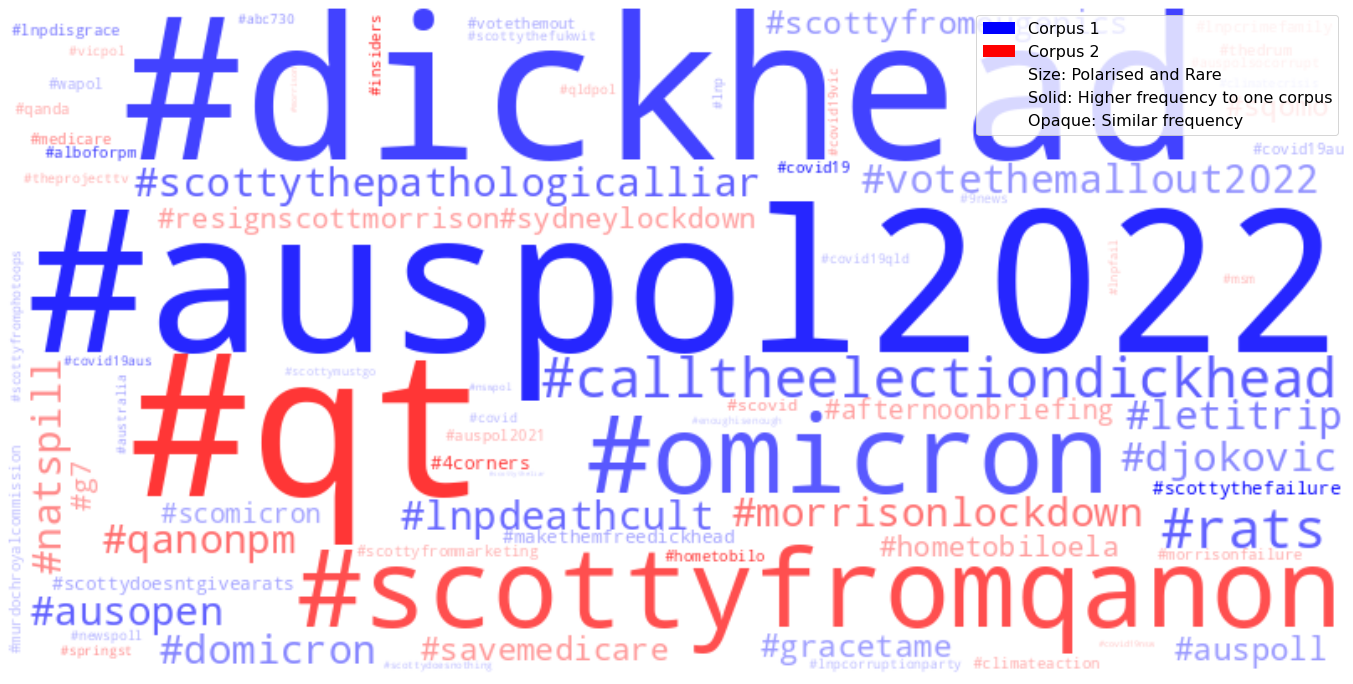

In [22]:
# getting hashtags using a user defined function
Jux(corpora['jan'], corpora['jun']).polarity.wordcloud('tf', top=TOP, colours=('blue', 'red'), tokeniser_func=extract_hashtags)

In [24]:
auspol = corpora['auspol']
corpora['android'] = auspol.slicer.filter_by_item('source', 'Twitter for Android')
corpora['iphone'] = auspol.slicer.filter_by_item('source', 'Twitter for iPhone')
corpora['2021'] = auspol.slicer.filter_by_datetime('created_at', start='01-01-2021', end='01-01-2022')
corpora['2022'] = auspol.slicer.filter_by_datetime('created_at', start='01-01-2022', end='01-01-2023')

auspol 50000
jun-orig-rt5+ 57
jun 4342
jan 4786
android 12734
iphone 14950


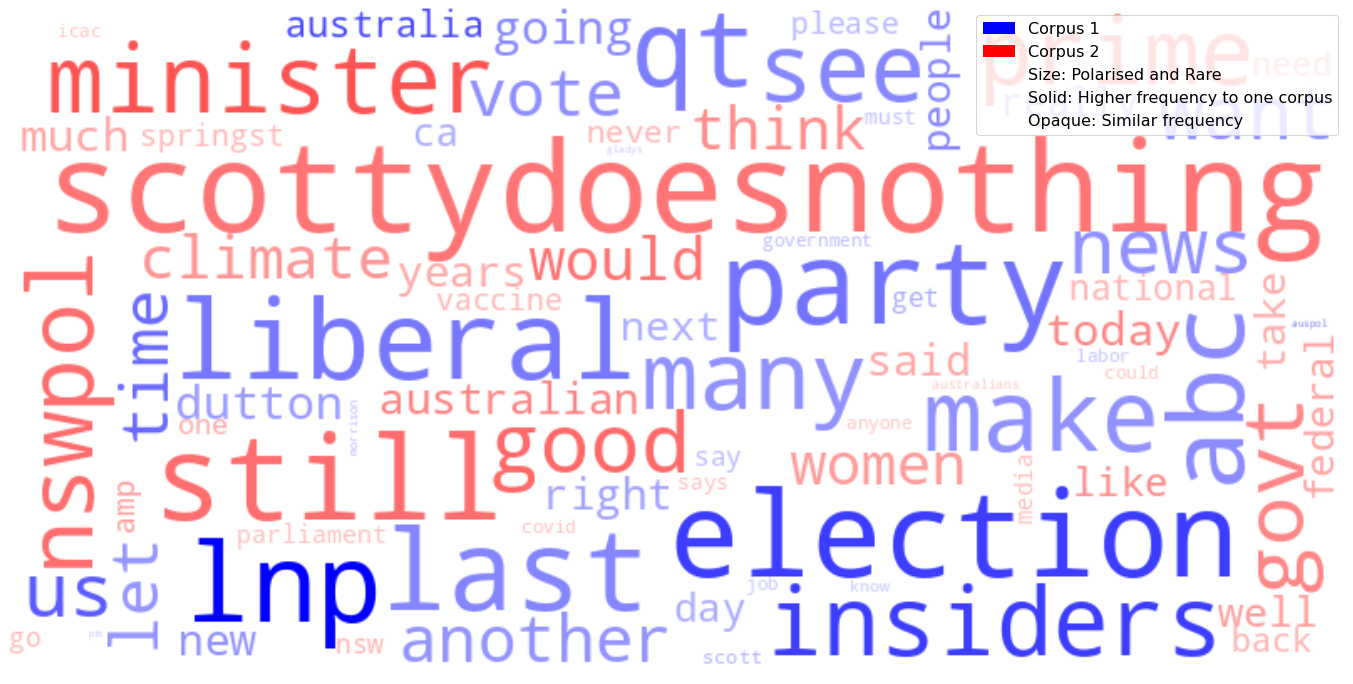

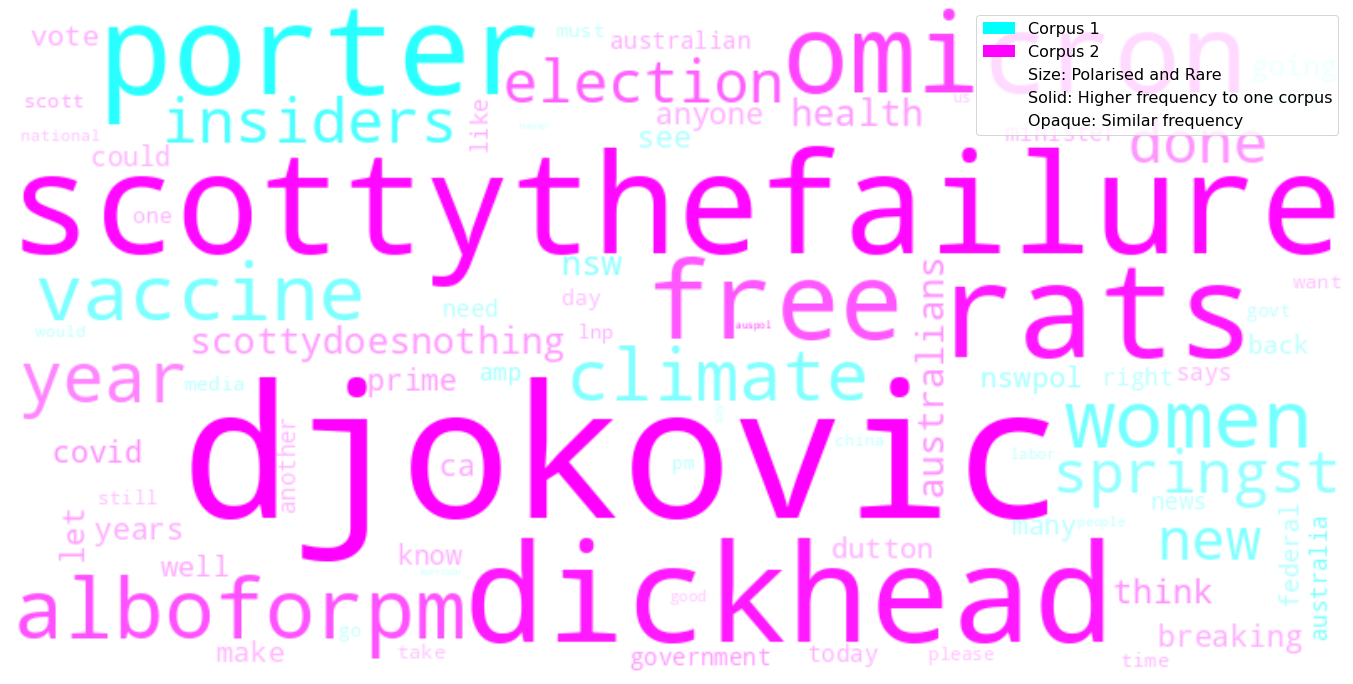

In [28]:
corpus_pairs = [
    ('android', 'iphone', ('blue', 'red')),
    ('2021', '2022', ('cyan', 'magenta')),
]

for pair in corpus_pairs:
    colours = pair[2]
    Jux(corpora[pair[0]], corpora[pair[1]]).polarity.wordcloud('tf', top=TOP, colours=colours)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)

In [ ]:
ef style_corpus(row, colour):
    return ['color:red;']*len(row) if colour[row.name] else ['color:blue;']*len(row)

jul_ft = corpora['jul'].dtm.freq_table().series
jan_ft = corpora['jan'].dtm.freq_table().series
df_ft = pd.concat([jan_ft.rename('jan'), jul_ft.rename('jul')], axis=1, join='outer').fillna(0)
colour = df_ft['jan'] > df_ft['jul']

In [ ]:
llv = Jux(corpora['jan'], corpora['jul']) \
    .stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:30].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

# Red - Overused in January Corpus, Blue - Overused in July Corpus

# Closing

+ Release is planned tentatively in **May**.
+ We will eventually integrate the ATAP tools together so you can easily access it under Corpus.